In [1]:
from sympy import *
init_printing(use_latex = True)

## 1. 定义变量

In [57]:
# 常用常量
E    # symbol.E 自然对数
I    # 虚数
pi   # 圆周率
oo   # 无穷大

In [3]:
# 定义单个变量
x = Symbol('x')

In [4]:
# 定义多个变量
x, y, z = symbols('x, y, z')
x, y, z = symbols('x y z')

In [5]:
# 定义列表变量，类似切片
x = symbols('x0:10')
display(x)
display(x[0], x[8])

In [6]:
# 指定变量类型
x_pos, y_pos = symbols('x_0, y_0', postive='True') # 正数
display(x_pos, y_pos)

alpha_R = symbols('alpha_R', real='True') # 实数
display(alpha_R)

beta_Z = symbols('beta_Z', intger='True') # 整数
display(beta_Z)

In [ ]:
# 声明分数
Rational(1, 3)

## 2. 表达式

In [7]:
# 定义表达式
x, y = symbols('x, y')
expr = (x+y)**10
display(expr)

In [8]:
# 因式分解
expand(expr)

In [65]:
# 约分
cancel((x**2 + 2*x + 1)/(x**2 + x))

In [9]:
# 对应符号，合并表达式
display(y*x**2 + 3*x**2 - x*y  -1)
collect(y*x**2 + 3*x**2 - x*y  -1, x)

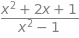

In [10]:
# 对表达式进行化简
display((x**2 + 2*x + 1) / (x**2 - 1))
simplify((x**2 + 2*x + 1) / (x**2 - 1))

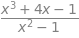

In [11]:
# 部分分式(裂项)
display((x**3 + 4*x - 1) / (x**2 - 1))
apart((x**3 + 4*x - 1) / (x**2 - 1))

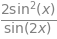

In [66]:
# 变换形式
tan(x).rewrite(sin(x))

In [12]:
# 替换操作expr.subs
x, y = symbols('x, y')

# 部分替换
expr = (x + y)**2
display(expr.subs({x:1, y:x}))

# 全部替换
expr = (x + y)**2
float(expr.subs({x:1, y:2}))

In [69]:
# 数列求和
Sum(x ** 2, (x, 1, a)).doit() # 加doit展开求和表达式

In [70]:
# 数列求积
Product(x**2,(x, 1, a)).doit()

In [13]:
# sympy函数 转 numpy函数
expr = (x + y)**2
fun = lambdify([x, y], expr, 'numpy')
# fun = lambdify([x, y], expr, 'math')
print(fun(1,2))

# 用转换成numpy的函数处理numpy类型数据
import numpy as np
print( fun(np.arange(3), np.array([4,5,6])) )

9
[16 36 64]


## 3. 方程

In [14]:
# 定义方程
Eq(x**2, 1)

In [15]:
# 解方程
solveset(Eq(x**2, 1), x)
# solve(Eq(x**2, 1), x)

In [16]:
# 解不等式
solveset(exp(x) > 1, x, domain=S.Reals)

In [17]:
# 解线性方程
x, y, z = symbols('x, y, z')
linsolve([x+y+z-1, x+y+2*z-3, x-z-1], (x, y, z))

In [18]:
# 同上
x1 = Symbol('x1')
x2 = Symbol('x2')
f1 = x1 + x2 - 3
f2 = x1 - x2 + 5
solve([f1, f2], (x1, x2))

In [19]:
# 解简单的非线性方程
x, y = symbols('x, y')
nonlinsolve([x**2 - y - 6, 2*y + x - 1], [x, y]) # 值一般要转为float类型

In [20]:
# 解三角函数方程
solve([sin(x+y) - 1, cos(x-y) + 1], [x, y])

## 4. 微积分

In [64]:
# 计算求和式
summation(x**2, (x, 1, 10))

In [21]:
# 求极限
limit(sin(x)/x, x, 0)

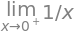

In [22]:
Limit(1/x, x, 0, dir='+') # 大写L得到表达式

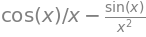

In [23]:
# 求微分
diff(sin(x)/x, x)

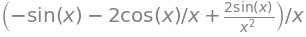

In [24]:
# 求二阶微分
diff(sin(x)/x, x, x)
# diff(sin(x)/x, x, 2)

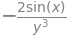

In [25]:
# 先求x二阶微分，再求y二阶微分
diff(sin(x)/y, x, 2, y, 2) 

In [26]:
# 泰勒展开
exp(x).series()

In [27]:
x = Symbol('x')
expr = exp(sin(x**2 + pi))
expr.series(x)

In [28]:
# 在 x=1 处展开
exp(x).series(x, 1)

In [29]:
# 求偏导
f = exp(2*x)*sin(5*y)
f.diff(x)

In [30]:
# 先对x求偏导，在对y求偏导
f = exp(2*x)*sin(5*y)
f.diff(x, y)

In [31]:
x, y = symbols('x, y')
f = exp(2*x)*sin(5*y)
from sympy import ordered, Matrix, hessian

# 梯度
gradient = lambda f, v: Matrix([f]).jacobian(v)
display(gradient(f, [x,y]))

# hessian 黑塞矩阵
display(hessian(f, [x,y]))

⎡   2⋅x              2⋅x         ⎤
⎣2⋅ℯ   ⋅sin(5⋅y)  5⋅ℯ   ⋅cos(5⋅y)⎦

⎡   2⋅x                2⋅x          ⎤
⎢4⋅ℯ   ⋅sin(5⋅y)   10⋅ℯ   ⋅cos(5⋅y) ⎥
⎢                                   ⎥
⎢    2⋅x                2⋅x         ⎥
⎣10⋅ℯ   ⋅cos(5⋅y)  -25⋅ℯ   ⋅sin(5⋅y)⎦

In [32]:
# 求积分
n = symbols('n', intger='True')
x, y, z = symbols('x, y, z')

integrate(x**2, x)

In [33]:
# 求定积分
integrate(x**2, (x, 0, 3)).evalf(10)

## 5. Sympy绘图

In [34]:
# 绘图包
from sympy.plotting import *

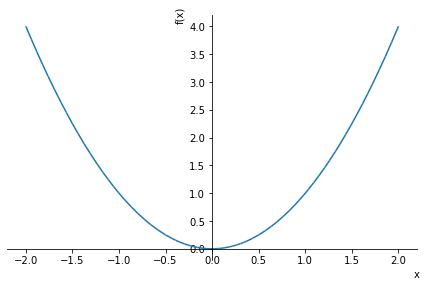

In [35]:
# 绘制x^2函数图
plt = plot(x**2, (x, -2, 2), show=False)
plt.show()

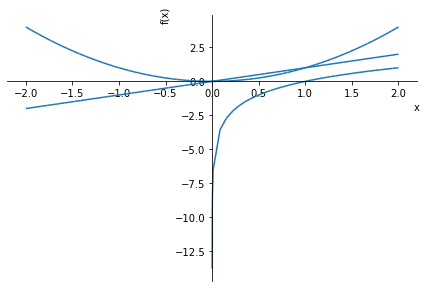

In [36]:
## 同时绘制多个函数
plt = plot(x**2, x, log(x,2), (x, -2, 2), show = True)

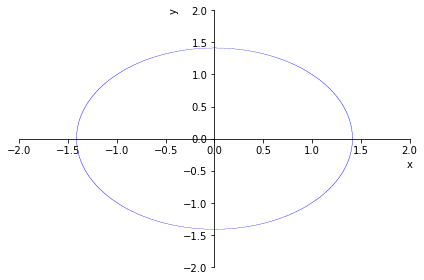

In [37]:
# 绘制隐函数
plot_implicit(x**2 + y**2 - 2, (x,-2, 2), (y, -2, 2))

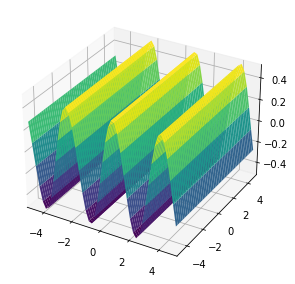

In [38]:
# 绘制3D图像
plot3d(sin(x) * cos(x), (x, -5, 5), (y, -5, 5))

## 6. 微分方程

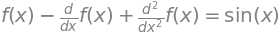

In [39]:
# 定义微分方程
f, g = symbols('f, g', cls = Function) # f,g 都为方程
eqn = Eq(f(x).diff(x,2) - f(x).diff(x) + f(x), sin(x))
eqn

In [40]:
# 求解微分方程
sol = dsolve(eqn, f(x))
sol

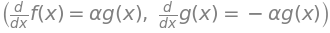

In [41]:
# 微分方程组
alpha = symbols('alpha', postive=True)
eqn = Eq(f(x).diff(x), alpha*g(x)), Eq(g(x).diff(x), -alpha*g(x))
eqn

In [42]:
# 解微分方程组
dsolve(eqn, (f(x), g(x)))

## 7. 矩阵

In [43]:
# 定义矩阵
A = Matrix([[1,2,0], [4,5,-1], [7,8,1]])
display(A)
B = Matrix([[1,2,x], [4,y,6], [7,8,9]])
display(B)

⎡1  2  0 ⎤
⎢        ⎥
⎢4  5  -1⎥
⎢        ⎥
⎣7  8  1 ⎦

⎡1  2  x⎤
⎢       ⎥
⎢4  y  6⎥
⎢       ⎥
⎣7  8  9⎦

In [44]:
# 转置
A.T

⎡1  4   7⎤
⎢        ⎥
⎢2  5   8⎥
⎢        ⎥
⎣0  -1  1⎦

In [45]:
# 矩阵的逆
display(A.inv())

⎡-13/9  2/9   2/9 ⎤
⎢                 ⎥
⎢11/9   -1/9  -1/9⎥
⎢                 ⎥
⎣ 1/3   -2/3  1/3 ⎦

In [46]:
# 带符号的矩阵的逆
A = Matrix([[1,2,x], [x,5,-1], [2,8,-1]])
display(A)
display(A.inv())

⎡1  2  x ⎤
⎢        ⎥
⎢x  5  -1⎥
⎢        ⎥
⎣2  8  -1⎦

⎡       -12              8⋅x + 2        -(5⋅x + 2)   ⎤
⎢──────────────────   ──────────────   ──────────────⎥
⎢      2                 2                2          ⎥
⎢- 32⋅x  + 32⋅x + 4   8⋅x  - 8⋅x - 1   8⋅x  - 8⋅x - 1⎥
⎢                                                    ⎥
⎢                                           2        ⎥
⎢      x - 2           -(2⋅x + 1)          x  + 1    ⎥
⎢  ──────────────     ──────────────   ──────────────⎥
⎢     2                  2                2          ⎥
⎢  8⋅x  - 8⋅x - 1     8⋅x  - 8⋅x - 1   8⋅x  - 8⋅x - 1⎥
⎢                                                    ⎥
⎢     8⋅x - 10              4           -(2⋅x - 5)   ⎥
⎢  ──────────────    ────────────────  ──────────────⎥
⎢     2                   2               2          ⎥
⎣  8⋅x  - 8⋅x - 1    - 8⋅x  + 8⋅x + 1  8⋅x  - 8⋅x - 1⎦

In [47]:
# 求矩阵特征值
A = Matrix([[3, -2, 4, -2], [5, 3, -3, -2], [5, -2, 2, -2], [5, -2, -3, 3]])
display(A)
A.eigenvals()

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [48]:
# 求特征向量
A.eigenvects()

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

In [49]:
# 对角化
P, D = A.diagonalize()
display(P, D)

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

In [50]:
# 单位矩阵
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [51]:
# 对角矩阵
diag(1,2, 3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

In [52]:
# 全1矩阵
ones(3, 3)

⎡1  1  1⎤
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  1  1⎦

In [53]:
# 将矩阵作为对角
display(diag(-1, ones(2,2), Matrix([5, 7, 5])))
display(diag(-1, ones(2,2), diag(5, 7, 5)))

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  1  0⎥
⎢           ⎥
⎢0   1  1  0⎥
⎢           ⎥
⎢0   0  0  5⎥
⎢           ⎥
⎢0   0  0  7⎥
⎢           ⎥
⎣0   0  0  5⎦

⎡-1  0  0  0  0  0⎤
⎢                 ⎥
⎢0   1  1  0  0  0⎥
⎢                 ⎥
⎢0   1  1  0  0  0⎥
⎢                 ⎥
⎢0   0  0  5  0  0⎥
⎢                 ⎥
⎢0   0  0  0  7  0⎥
⎢                 ⎥
⎣0   0  0  0  0  5⎦

In [54]:
# 全0矩阵
zeros(3,3)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [55]:
# reshape
zeros(5,4).reshape(2, 10)

⎡0  0  0  0  0  0  0  0  0  0⎤
⎢                            ⎥
⎣0  0  0  0  0  0  0  0  0  0⎦